# Fourier Decomposition


### Peter Onyisi
<img src="images/texas_logo.png" width="400" align="left"/>

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['animation.embed_limit'] = 60
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
import math
import numpy
from matplotlib import animation

This isn't intended to be an introduction to Fourier theory - I just want to illustrate a point.

I've referred to the idea that a wave function can have multiple momentum components. Fundamentally what is meant by that is that the wave function does not have a single wavelength. Consider this wave packet:

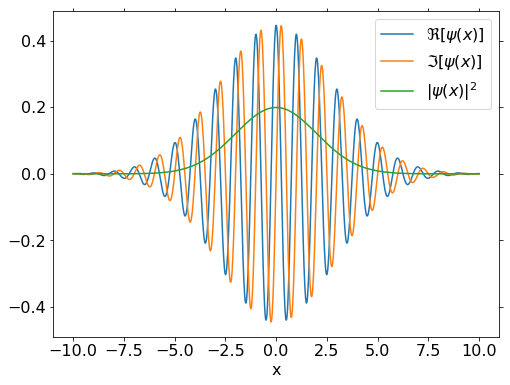

In [2]:
def gaus_wavepacket(x, p, sigma):
    return (1/(2*math.pi*sigma**2)**.25)*numpy.exp(-x**2/(4*sigma**2))*numpy.exp(p*2*math.pi*1j*x)

xvals=numpy.linspace(-10,10,1000)
P=+1
SIGMA=2
packet = gaus_wavepacket(xvals, P, SIGMA)
plt.plot(xvals, packet.real, label='$\Re[\psi(x)]$')
plt.plot(xvals, packet.imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(packet)**2, label='$|\psi(x)|^2$')

plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.show()

We can see that the real and imaginary parts have a sort-of-sinusoidal behavior, and we could say (e.g. looking at the distance between peaks for the real part) that it has a wavelength around 1. However it cannot _really_ be said to have a wavelength 1, because the wave does not actually repeat after $\Delta x = 1$: instead the magnitude gets a bit bigger or a bit smaller. So although we clearly have something like a wavelength here, it cannot be an exact definition.  Consider this much smaller wave packet:

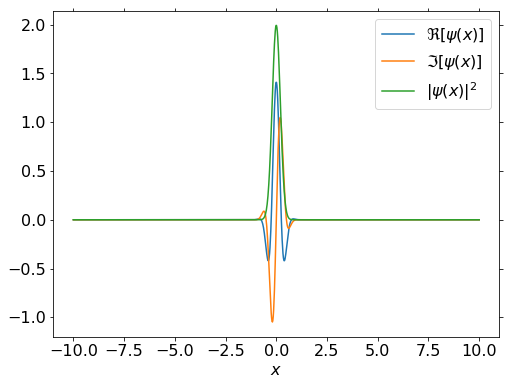

In [3]:
xvals=numpy.linspace(-10,10,1000)
P=+1
SIGMA=0.2
packet = gaus_wavepacket(xvals, P, SIGMA)
plt.plot(xvals, packet.real, label='$\Re[\psi(x)]$')
plt.plot(xvals, packet.imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(packet)**2, label='$|\psi(x)|^2$')

plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.show()

Now it's clear that it's very hard to imagine describing this wave function with a single wavelength.

Since the momentum and the wavelength of the wave function are precisely related through $\lambda = h/p$ (or $p = h/\lambda$), if the wavelength $\lambda$ is not well-defined, the momentum $p$ can't be either. The only wave functions that have precisely defined momenta are ones that have precise wavelengths, which means they continue forever periodically

However we can exploit a property of waves: the principle of superposition. If I have two wave functions, I can add them together (as long as I also normalize the resulting sum correctly to get $\int_{-\infty}^{\infty} |\psi(x)|^2\ dx = 1$). So I can add together multiple pure momentum wave functions and get a potential wave function. Let's try an example, adding together wave functions of wavelength 0.9 and 1.1 together equally:

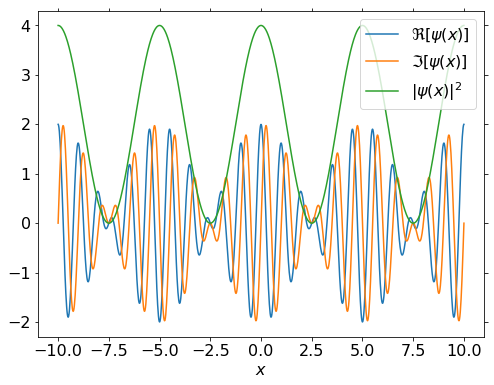

In [6]:
def mom_wavefcn(x, p):
    return numpy.exp(p*2*math.pi*1j*x)

xvals=numpy.linspace(-10,10,1000)
list_of_P = [0.9, 1.1]
coefficients = [1, 1]
packet = numpy.zeros_like(xvals, dtype=numpy.complex128)
for P, C in zip(list_of_P, coefficients):
    packet += C*mom_wavefcn(xvals, P)
plt.plot(xvals, packet.real, label='$\Re[\psi(x)]$')
plt.plot(xvals, packet.imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(packet)**2, label='$|\psi(x)|^2$')

plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.show()

So we have an interesting result: we have a function that's still periodic, but in a complex way. It has a short "wavelength" of 1 (which is, again, not a proper wavelength since the function doesn't actually repeat on that cycle), and a long wavelength of 5. If we try instead adding waves of wavelength 0.95 and 1.05, we get:

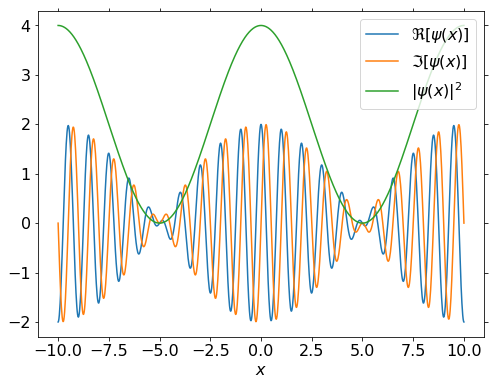

In [7]:
xvals=numpy.linspace(-10,10,1000)
list_of_P = [0.95, 1.05]
coefficients = [1, 1]
packet = numpy.zeros_like(xvals, dtype=numpy.complex128)
for P, C in zip(list_of_P, coefficients):
    packet += C*mom_wavefcn(xvals, P)
plt.plot(xvals, packet.real, label='$\Re[\psi(x)]$')
plt.plot(xvals, packet.imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(packet)**2, label='$|\psi(x)|^2$')

plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.show()

where now the "big" wavelength is 10. We can imagine that if we reduce the difference between the wavelengths that we are adding, we will stretch the long wavelength out indefinitely far: the "beat wavelength" between the waves depends on the difference of the two wavelengths and gets bigger as the difference gets smaller.  What we are seeing is that the two waves constructively interfere near $x =0$ but then destructively interfere as they go slowly out of step with each other as we move away from $x=0$.

For this resulting wavefunction, if we were to actually measure the momentum, we would get either 0.95 or 1.05, with 50% probability of the two. We can of course add together more wave functions; here's what happens if we add together ten equally spaced momenta with equal coefficients:

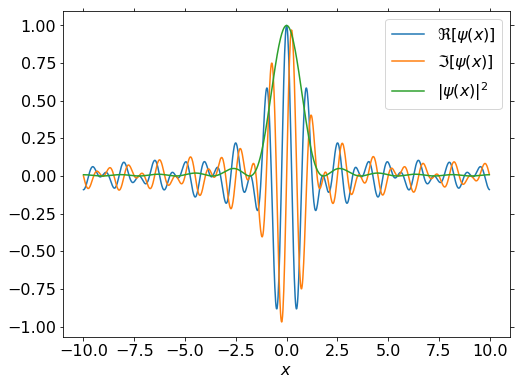

In [90]:
xvals=numpy.linspace(-10,10,1000, endpoint=False)
# xvals += (xvals[1]-xvals[0])/2.
list_of_P = numpy.linspace(0.75, 1.25, 11)
coefficients = numpy.full(list_of_P.shape, 1./len(list_of_P))
packet = numpy.zeros_like(xvals, dtype=numpy.complex128)
for P, C in zip(list_of_P, coefficients):
    packet += C*mom_wavefcn(xvals, P)
plt.plot(xvals, packet.real, label='$\Re[\psi(x)]$')
plt.plot(xvals, packet.imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(packet)**2, label='$|\psi(x)|^2$')

plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.show()

If we were to measure the momentum of this wave function, we would get the value for one of the pure momentum wave functions we put in, with equal probability because the coefficients of each term in the sum are equal. The Fourier transform takes the sum wave function and tells us which pure momentum wave functions comprise it, along with the coefficients:

No handles with labels found to put in legend.


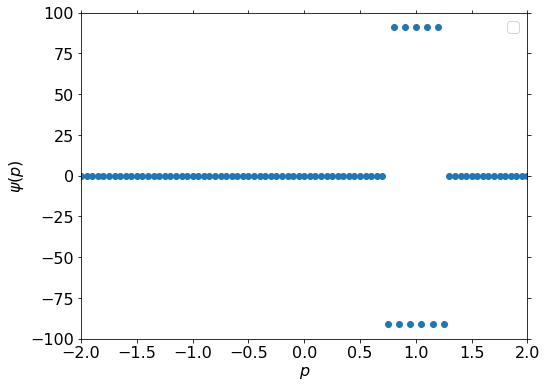

In [91]:
# Get momentum distribution of wave packet, using a Fourier transform
fftx = numpy.fft.fftfreq(xvals.size, d=xvals[1]-xvals[0])
fftpsi = numpy.fft.fft(packet)
plt.scatter(fftx, numpy.real(fftpsi))
plt.xlim(-2,2)
plt.xlabel('$p$')
plt.ylabel('$\psi(p)$')
plt.legend()
plt.show()

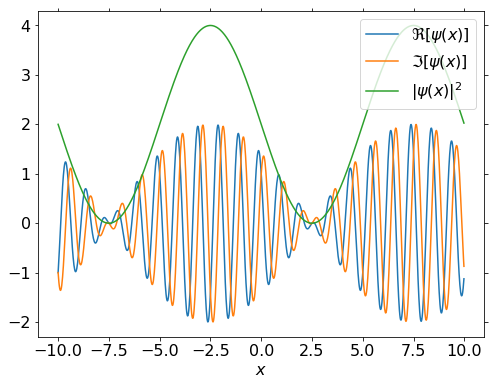

In [19]:
xvals=numpy.linspace(-10,10,1001, endpoint=False)
list_of_P = [0.95, 1.05]
coefficients = [1, 1j]
packet = numpy.zeros_like(xvals, dtype=numpy.complex128)
for P, C in zip(list_of_P, coefficients):
    packet += C*mom_wavefcn(xvals, P)
plt.plot(xvals, packet.real, label='$\Re[\psi(x)]$')
plt.plot(xvals, packet.imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(packet)**2, label='$|\psi(x)|^2$')

plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.show()

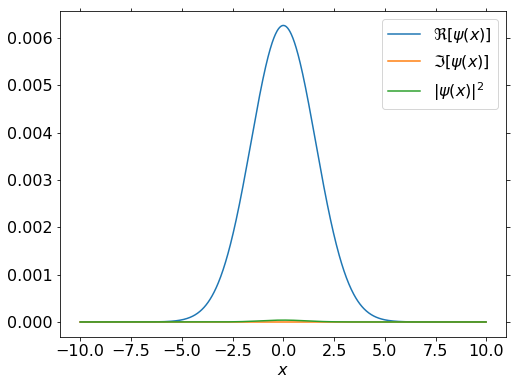

In [96]:
xvals=numpy.linspace(-10,10,1001, endpoint=False)
list_of_P = numpy.linspace(-20, 20, 1000)
psigma = 0.1
coefficients = numpy.exp(-list_of_P**2/2/psigma**2)/len(list_of_P)
packet = numpy.zeros_like(xvals, dtype=numpy.complex128)
for P, C in zip(list_of_P, coefficients):
    packet += C*mom_wavefcn(xvals, P)
plt.plot(xvals, packet.real, label='$\Re[\psi(x)]$')
plt.plot(xvals, packet.imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(packet)**2, label='$|\psi(x)|^2$')

plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.show()

In [44]:
fftx

array([ 0.  ,  0.05,  0.1 , ..., -0.15, -0.1 , -0.05])

In [27]:
list_of_P

array([0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25])

In [31]:
fftpsi

array([ 2.40363285e-14-1.39596693e-15j,  2.90878432e-14+1.49569054e-14j,
        2.88657986e-14+1.14650156e-15j, ...,
       -6.85396431e-15+3.27279130e-15j,  5.50679923e-15+9.27100379e-15j,
        3.27450455e-14+1.42188913e-14j])

In [43]:
xvals.size

2000

In [42]:
xvals[1]-xvals[0]

0.009999999999999787

In [46]:
xvals[1]

-9.99

In [49]:
fftpsi[40]

(-2.3417686369897515e-14-3.2489567760490174e-16j)

In [50]:
len(fftpsi)

1000

In [86]:
fftx[20]

0.9990009990010202

In [54]:
fftpsi[19]

(-90.90909090909076-1.0647857621345854e-13j)

In [58]:
fftx[20]

1.0

In [89]:
xvals[0]

-9.99